# Importing Libraries

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import chi2_contingency 
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

# Data Cleaning


In [7]:
data = pd.read_csv('data.csv')
data

,inter_dom,Region,Gender,Academic,Age,Age_cate,Stay,Stay_Cate,Japanese,Japanese_cate,...,Friends_bi,Parents_bi,Relative_bi,Professional_bi,Phone_bi,Doctor_bi,religion_bi,Alone_bi,Others_bi,Internet_bi
0,Inter,SEA,Male,Grad,24.0,4.0,5.0,Long,3.0,Average,...,Yes,Yes,No,No,No,No,No,No,No,No
1,Inter,SEA,Male,Grad,28.0,5.0,1.0,Short,4.0,High,...,Yes,Yes,No,No,No,No,No,No,No,No
2,Inter,SEA,Male,Grad,25.0,4.0,6.0,Long,4.0,High,...,No,No,No,No,No,No,No,No,No,No
3,Inter,EA,Female,Grad,29.0,5.0,1.0,Short,2.0,Low,...,Yes,Yes,Yes,Yes,No,No,No,No,No,No
4,Inter,EA,Female,Grad,28.0,5.0,1.0,Short,1.0,Low,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


After observing the dataset, I realised that the last few entries had missing data. I then decided to check the last few rows to find how much missing data there was. After which, I removed the missing data.

In [8]:
data.tail(20)

,inter_dom,Region,Gender,Academic,Age,Age_cate,Stay,Stay_Cate,Japanese,Japanese_cate,...,Friends_bi,Parents_bi,Relative_bi,Professional_bi,Phone_bi,Doctor_bi,religion_bi,Alone_bi,Others_bi,Internet_bi
266,Dom,JAP,Male,Under,19.0,2.0,1.0,Short,5.0,High,...,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,No
267,Dom,JAP,Male,Under,20.0,2.0,2.0,Medium,5.0,High,...,Yes,No,No,No,No,No,No,Yes,No,No
268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,128,137,66,61,30,46,19,65,21,45
270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,140,131,202,207,238,222,249,203,247,223
271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,128,137,66,61,30,46,19,65,21,45
273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,140,131,202,207,238,222,249,203,247,223
274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
data = data[0:268]
data.isnull().sum(axis = 0)

inter_dom           0
Region              0
Gender              0
Academic            0
Age                 0
Age_cate            0
Stay                0
Stay_Cate           0
Japanese            0
Japanese_cate       0
English             0
English_cate        0
Intimate            8
Religion            0
Suicide             0
Dep                 0
DepType             0
ToDep               0
DepSev              0
ToSC                0
APD                 0
AHome               0
APH                 0
Afear               0
ACS                 0
AGuilt              0
AMiscell            0
ToAS                0
Partner             0
Friends             0
Parents             0
Relative            0
Profess             0
 Phone              0
Doctor              0
Reli                0
Alone               0
Others              0
Internet           26
Partner_bi          0
Friends_bi          0
Parents_bi          0
Relative_bi         0
Professional_bi     0
Phone_bi            0
Doctor_bi 

## Replacing missing values with the median of the column
The 'Internet' column has missing entries and I replaced them with the median of the column


In [10]:
internet_median = data['Internet'].median()
data['Internet'].fillna(value=internet_median, inplace=True)
data

/Users/presh/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


,inter_dom,Region,Gender,Academic,Age,Age_cate,Stay,Stay_Cate,Japanese,Japanese_cate,...,Friends_bi,Parents_bi,Relative_bi,Professional_bi,Phone_bi,Doctor_bi,religion_bi,Alone_bi,Others_bi,Internet_bi
0,Inter,SEA,Male,Grad,24.0,4.0,5.0,Long,3.0,Average,...,Yes,Yes,No,No,No,No,No,No,No,No
1,Inter,SEA,Male,Grad,28.0,5.0,1.0,Short,4.0,High,...,Yes,Yes,No,No,No,No,No,No,No,No
2,Inter,SEA,Male,Grad,25.0,4.0,6.0,Long,4.0,High,...,No,No,No,No,No,No,No,No,No,No
3,Inter,EA,Female,Grad,29.0,5.0,1.0,Short,2.0,Low,...,Yes,Yes,Yes,Yes,No,No,No,No,No,No
4,Inter,EA,Female,Grad,28.0,5.0,1.0,Short,1.0,Low,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,Dom,JAP,Female,Under,21.0,3.0,4.0,Long,5.0,High,...,Yes,Yes,No,No,No,No,No,No,No,Yes
264,Dom,JAP,Female,Under,22.0,3.0,3.0,Medium,3.0,Average,...,Yes,Yes,Yes,No,No,No,No,No,No,No
265,Dom,JAP,Female,Under,19.0,2.0,1.0,Short,5.0,High,...,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,No
266,Dom,JAP,Male,Under,19.0,2.0,1.0,Short,5.0,High,...,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,No


# Splitting the Dataframe into Numerical and Categorical variables

In [11]:
data_float = data.select_dtypes(include='number')
data_obj = data.select_dtypes(exclude = 'number')

## Univariate Analysis

/Users/presh/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


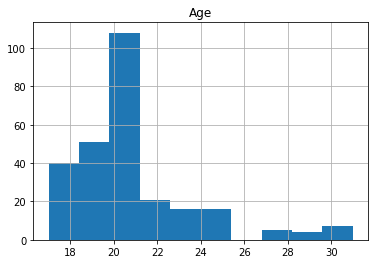

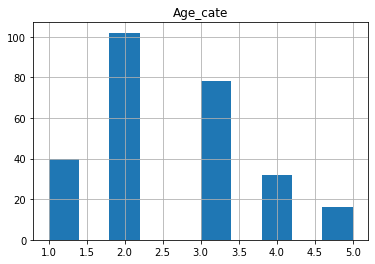

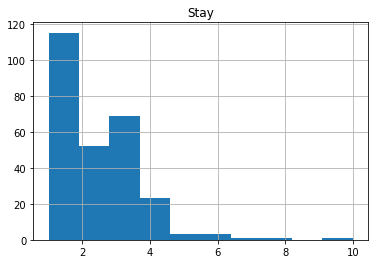

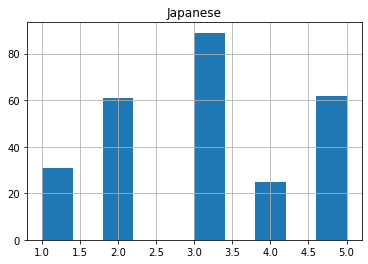

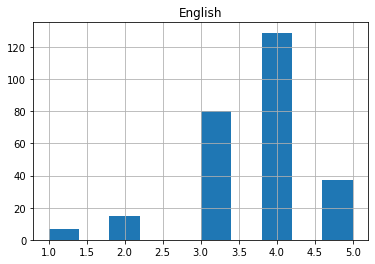

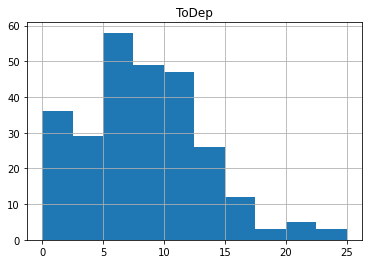

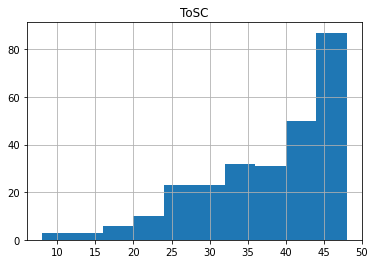

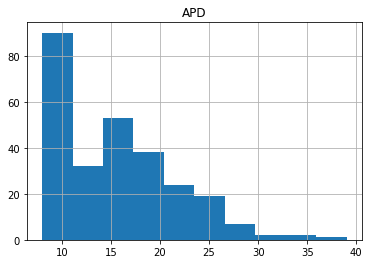

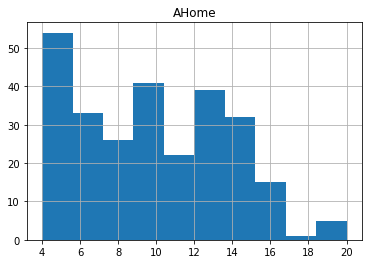

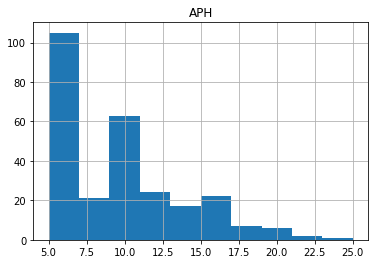

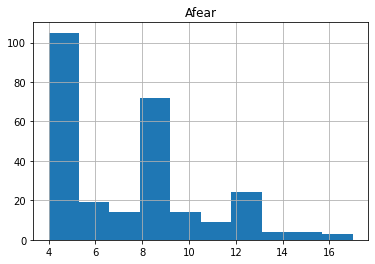

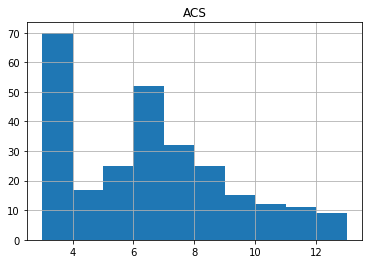

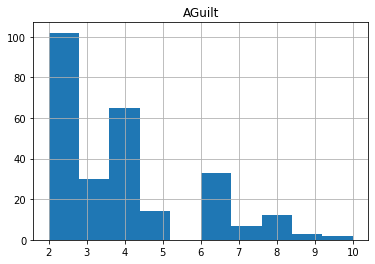

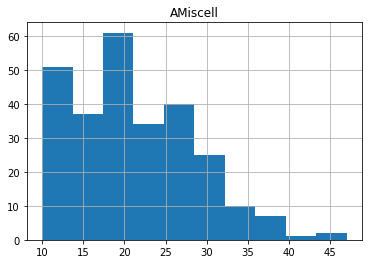

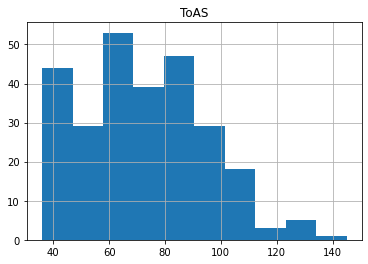

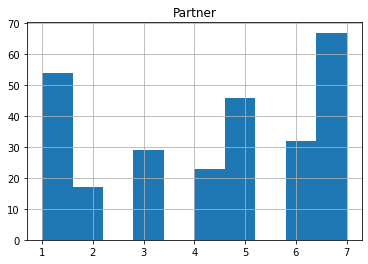

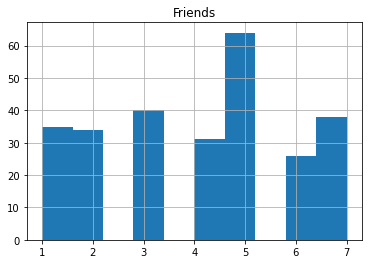

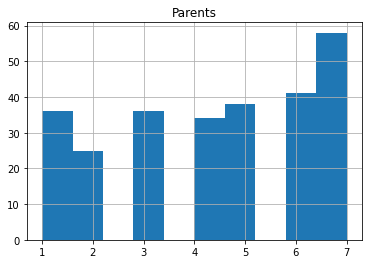

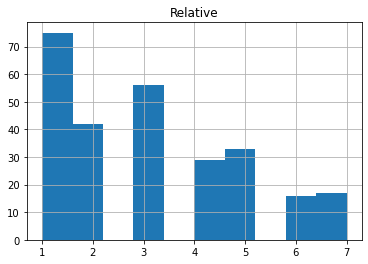

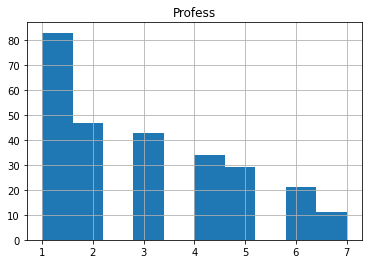

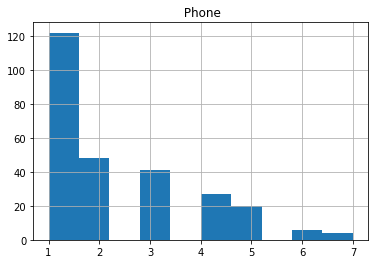

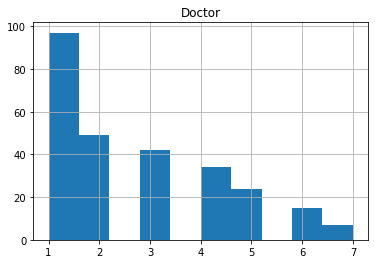

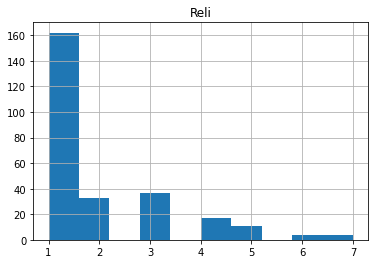

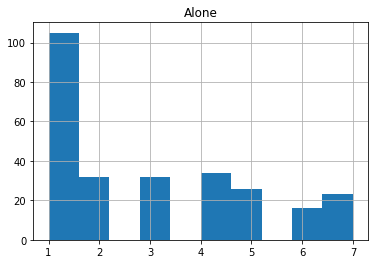

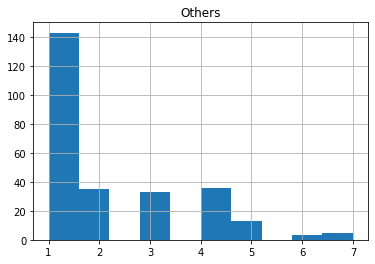

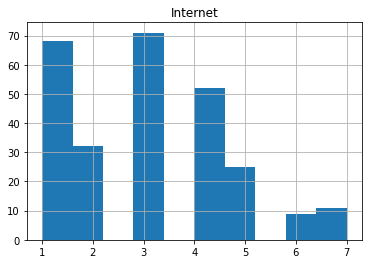

In [12]:
data_float_col = data_float.columns
data_float_col
for i in range (len(data_float_col)):
    data_float.hist(column = data_float_col[i])

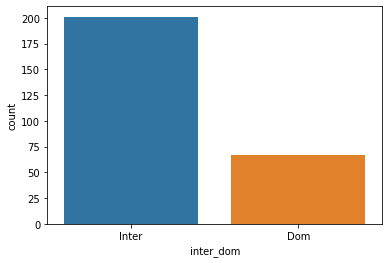

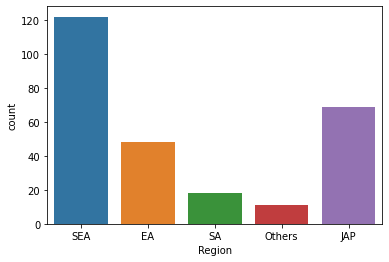

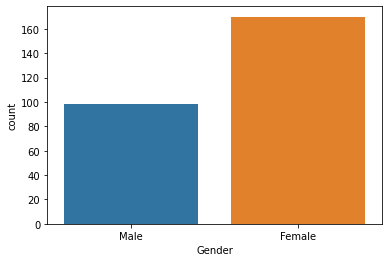

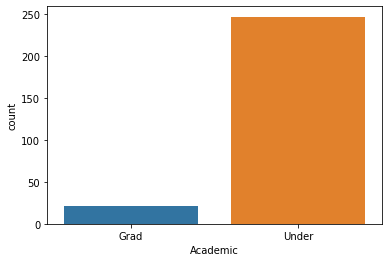

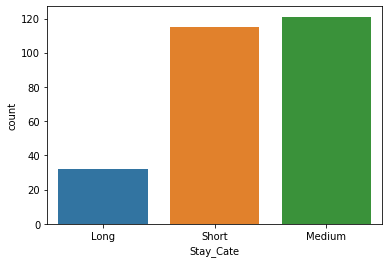

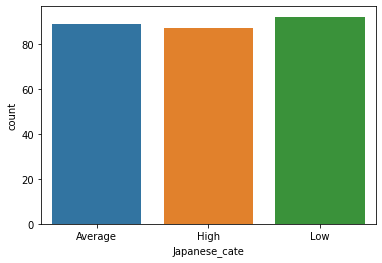

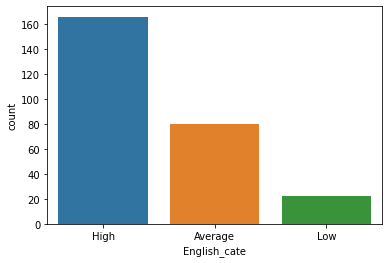

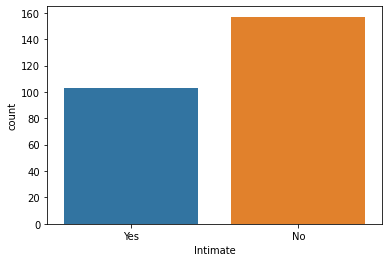

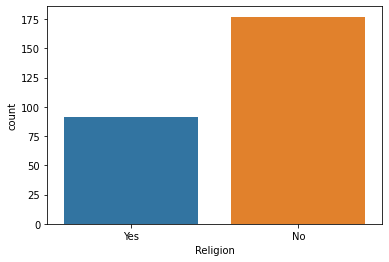

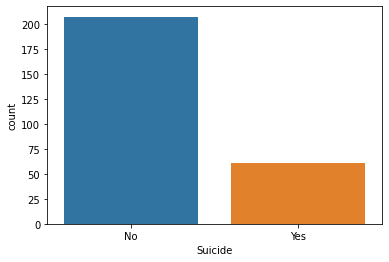

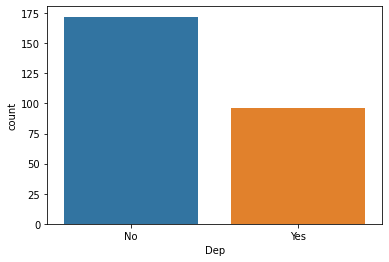

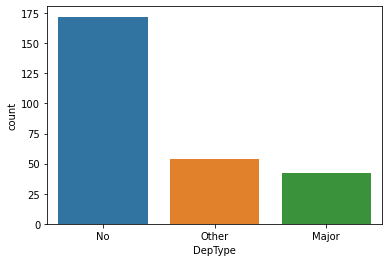

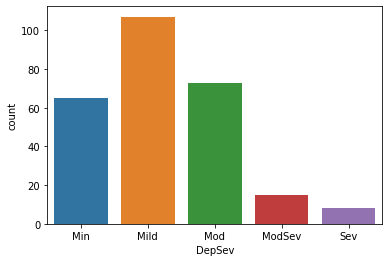

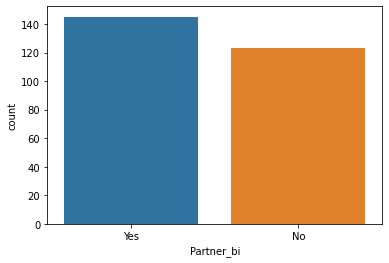

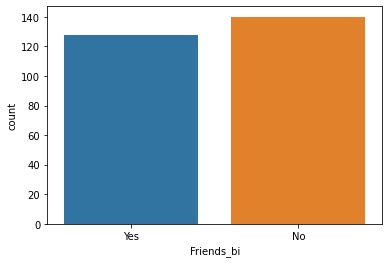

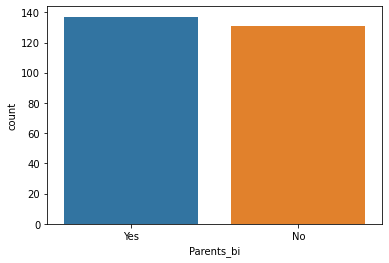

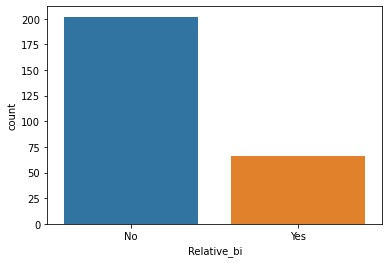

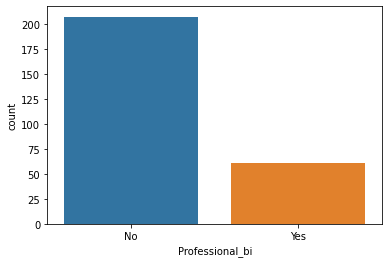

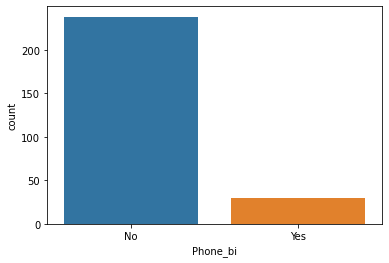

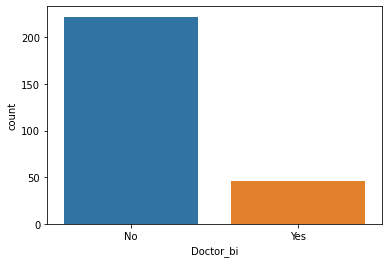

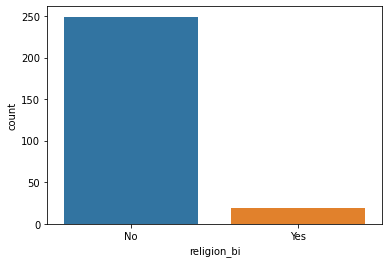

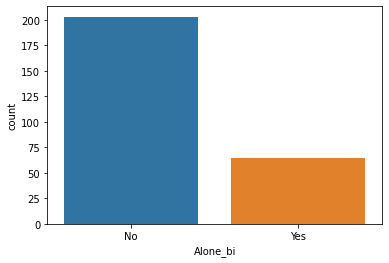

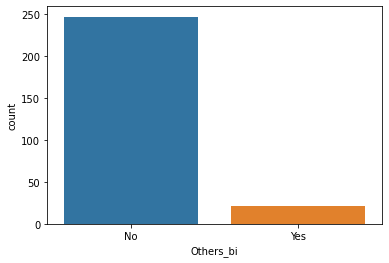

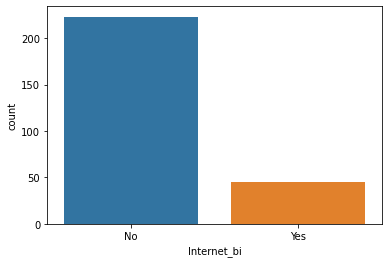

In [13]:
data_obj_col = data_obj.columns
for i in range (len(data_obj_col)):
    sns.countplot(x =data_obj_col[i], data = data_obj)
    plt.show()

The univariate analysis allowed me to make observations about the students that were observed for the study. Majority of the students involved in the study were Undergraduates and were International Students. However to make better sense of the data, I decided to conduct bivariate analysis on the dataset.

## Bivariate Analysis

### Numerical Variables vs Numerical Variables

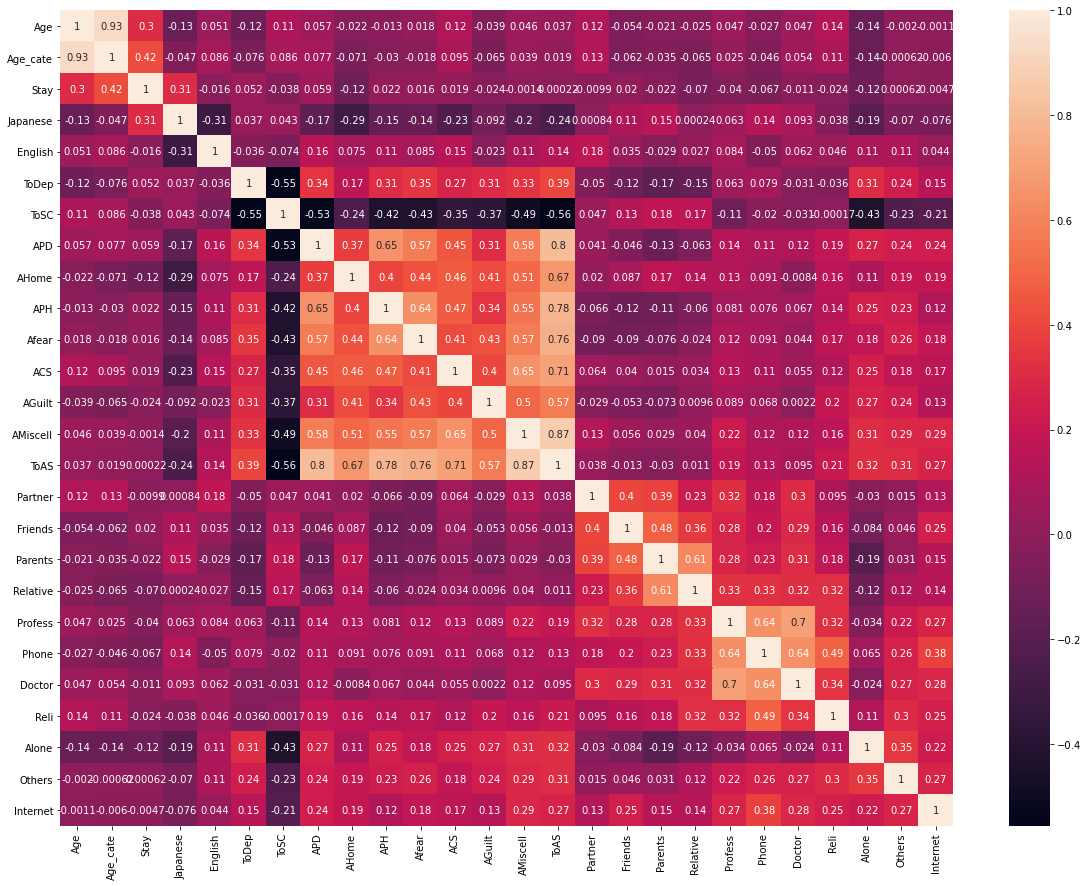

In [14]:
corrMatrix = data.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corrMatrix, annot = True)
plt.show()

From the correlation matrix, we see that there's a negative correlation between ToDep and ToSC (Total social connectedness). It makes sense since the more socially connected one is, the lower the depression score. Another interesting correlation that we see is a relatively high score between ToDep and APD (perceived discrimination score). We can hypothesize that the more discriminated a student feels, the higher the depression score.

### Numerical Variables vs Categorical Variables


Ttest_indResult(statistic=-0.8109206006749218, pvalue=0.41813622602092027)


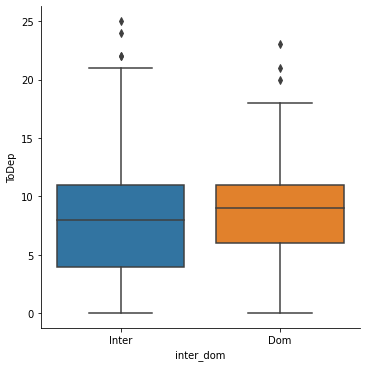

In [15]:
sns.catplot(x="inter_dom", y="ToDep", kind="box", data=data)
todep_inter = list(data[data['inter_dom']=='Inter']['ToDep'])
todep_dom = list(data[data['inter_dom']=='Dom']['ToDep'])
print(stats.ttest_ind(todep_inter,todep_dom))

Ttest_indResult(statistic=10.589085179497475, pvalue=4.290131684472933e-22)


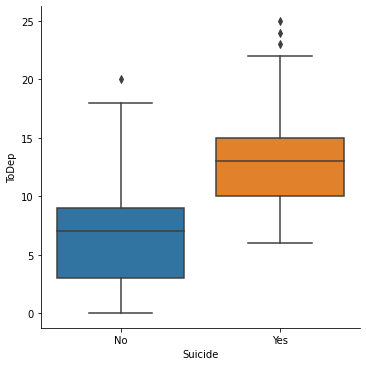

In [16]:
sns.catplot(x="Suicide", y="ToDep", kind="box", data=data)
todep_suicide = list(data[data['Suicide']=='Yes']['ToDep'])
todep_no_suicide = list(data[data['Suicide']=='No']['ToDep'])
print(stats.ttest_ind(todep_suicide,todep_no_suicide))

Ttest_indResult(statistic=-0.9285560600922729, pvalue=0.3539610264273153)


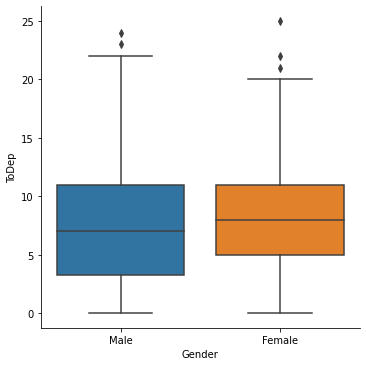

In [17]:
sns.catplot(x="Gender", y="ToDep", kind="box", data=data)

todep_male = list(data[data['Gender']=='Male']['ToDep'])
todep_female = list(data[data['Gender']=='Female']['ToDep'])
print(stats.ttest_ind(todep_male,todep_female))

For the Numerical vs Categorical variables, I plotted boxplots to observe the relationship that 'inter_dom','Suicide' and 'Gender' had on the depression scores. I also used independent t-tests to help determine whether there is a statistically significant difference between the means in two unrelated groups. From the plots above, the nationality and gender of the students does not affect the depression scores recorded.  

### Categorical Variables vs Categorical Variables

In [18]:
cont_R_S = pd.crosstab(data['Religion'],
                            data['Suicide'], 
                               margins = False)
print(cont_R_S)
print(chi2_contingency(cont_R_S, correction = False))

Suicide    No  Yes
Religion          
No        136   41
Yes        71   20
(0.04807139102897599, 0.8264538367156462, 1, array([[136.71268657,  40.28731343],
       [ 70.28731343,  20.71268657]]))


In [19]:
cont_I_S = pd.crosstab(data['Intimate'],
                            data['Suicide'], 
                               margins = False)
print(cont_I_S)
print(chi2_contingency(cont_I_S, correction = False))

Suicide    No  Yes
Intimate          
No        121   36
Yes        79   24
(0.004823449384700985, 0.9446305890065734, 1, array([[120.76923077,  36.23076923],
       [ 79.23076923,  23.76923077]]))


In [20]:
cont_D_S = pd.crosstab(data['Dep'],
                            data['Suicide'], 
                               margins = False)
print(cont_D_S)
print(chi2_contingency(cont_D_S, correction = False))

Suicide   No  Yes
Dep              
No       151   21
Yes       56   40
(30.410395344539786, 3.496494000232668e-08, 1, array([[132.85074627,  39.14925373],
       [ 74.14925373,  21.85074627]]))


In [21]:
cont_A_S = pd.crosstab(data['Alone_bi'],
                            data['Suicide'], 
                               margins = False)
print(cont_A_S)
print(chi2_contingency(cont_A_S, correction = False))

Suicide    No  Yes
Alone_bi          
No        169   34
Yes        38   27
(17.210215453133337, 3.3463209884254556e-05, 1, array([[156.79477612,  46.20522388],
       [ 50.20522388,  14.79477612]]))


For the analysis of the Categorical vs Categorical variables, I used contigency tables as well as performed chi-squared test of independence on each contogency table to see if the variables are independent of each other. From the analysis above, it can be seen that being religous and suicide ideation are independent of each other and having a partner in life and suicide ideation are independent of each other. However,having depressive symptoms and suicide ideation are dependent of each other and the willingness to solve problems by oneself and suicide ideation are dependent of each other.

# Preparing datasets for Machine Learning

In [22]:
data_float.to_csv('numerical.csv')

In [23]:
data_obj_dummies = pd.get_dummies(data_obj,drop_first=True)
data_obj_dummies

,inter_dom_Inter,Region_JAP,Region_Others,Region_SA,Region_SEA,Gender_Male,Academic_Under,Stay_Cate_Medium,Stay_Cate_Short,Japanese_cate_High,...,Friends_bi_Yes,Parents_bi_Yes,Relative_bi_Yes,Professional_bi_Yes,Phone_bi_Yes,Doctor_bi_Yes,religion_bi_Yes,Alone_bi_Yes,Others_bi_Yes,Internet_bi_Yes
0,1,0,0,0,1,1,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
1,1,0,0,0,1,1,0,0,1,1,...,1,1,0,0,0,0,0,0,0,0
2,1,0,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,1,0,...,1,1,1,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,1,0,...,1,1,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,0,1,0,0,0,0,1,0,0,1,...,1,1,0,0,0,0,0,0,0,1
264,0,1,0,0,0,0,1,1,0,0,...,1,1,1,0,0,0,0,0,0,0
265,0,1,0,0,0,0,1,0,1,1,...,1,1,1,1,1,1,0,0,0,0
266,0,1,0,0,0,1,1,0,1,1,...,1,1,1,1,1,1,0,0,0,0


In [24]:
data_obj_dummies.to_csv('dummies_obj.csv')

In [25]:
data_dummies = pd.get_dummies(data,drop_first=True)
data_dummies
data_dummies.to_csv('dummies.csv')

In [26]:
numerical_data = pd.read_csv('numerical.csv')
dummy_cat_data = pd.read_csv('dummies_obj.csv')
dummy_data = pd.read_csv('dummies.csv')

# Machine Learning - Based on ToDep score

## Numerical Data

I first decided to use the numerical dataset to perform the model training so that I can predict the ToDep score of students using the numerical variables

In [27]:
x = numerical_data.drop(['ToDep','Age_cate'],1)
y = numerical_data[['ToDep']]

In [28]:
# Splitting the independent and dependent variables into train and test sets using a 80/20 split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
print(len(x_train),len(x_test),len(y_train),len(y_test))

214 54 214 54


In [29]:
# Used DummyRegressor to establish a baseline for my predictions
dummy_regr = DummyRegressor(strategy = 'mean').fit(x_train,y_train)
y_predict = dummy_regr.predict(x_test)
y_predict

array([8.19158879, 8.19158879, 8.19158879, 8.19158879, 8.19158879,
       8.19158879, 8.19158879, 8.19158879, 8.19158879, 8.19158879,
       8.19158879, 8.19158879, 8.19158879, 8.19158879, 8.19158879,
       8.19158879, 8.19158879, 8.19158879, 8.19158879, 8.19158879,
       8.19158879, 8.19158879, 8.19158879, 8.19158879, 8.19158879,
       8.19158879, 8.19158879, 8.19158879, 8.19158879, 8.19158879,
       8.19158879, 8.19158879, 8.19158879, 8.19158879, 8.19158879,
       8.19158879, 8.19158879, 8.19158879, 8.19158879, 8.19158879,
       8.19158879, 8.19158879, 8.19158879, 8.19158879, 8.19158879,
       8.19158879, 8.19158879, 8.19158879, 8.19158879, 8.19158879,
       8.19158879, 8.19158879, 8.19158879, 8.19158879])

The RSME is 4.70132672379153


Text(0, 0.5, 'y_predict')

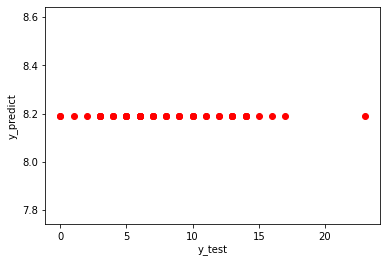

In [30]:
rmse = mean_squared_error(y_test, y_predict, squared=False)
print('The RSME is '+ str(rmse))
plt.scatter(y_test, y_predict,  color='red')
plt.xlabel('y_test')
plt.ylabel('y_predict')

After establishing a baseline, I decided to train with a Linear Regression Model, Decision Tree Model and a Random Forest Regressor to establish an ideal model.

### Linear Regression Model

The RSME is 3.917898533936792


Text(0, 0.5, 'y_predict_lm')

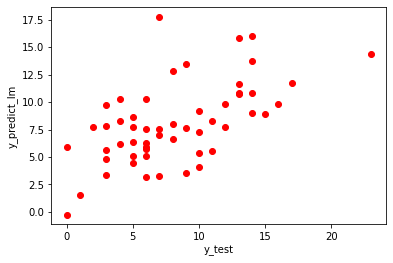

In [31]:
lm = LinearRegression()
lm.fit(x_train,y_train)
y_predict_lm = lm.predict(x_test)
rmse_lm = mean_squared_error(y_test, y_predict_lm, squared=False)
print('The RSME is '+ str(rmse_lm))

plt.scatter(y_test, y_predict_lm,  color='red')
plt.xlabel('y_test')
plt.ylabel('y_predict_lm')

### Decision Tree Model

The RSME is 5.446711546122731


Text(0, 0.5, 'y_predict_dt')

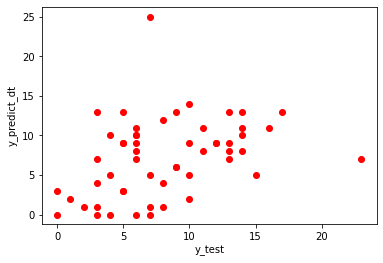

In [32]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_predict_dt = dt.predict(x_test)
rmse_dt = mean_squared_error(y_test, y_predict_dt, squared=False)
print('The RSME is '+ str(rmse_dt))

plt.scatter(y_test, y_predict_dt,  color='red')
plt.xlabel('y_test')
plt.ylabel('y_predict_dt')

### Random Forest Regressor Model

The RSME is 3.807644357809111


<ipython-input-33-ebdb1ce7f9ec>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


Text(0, 0.5, 'y_predict_rf')

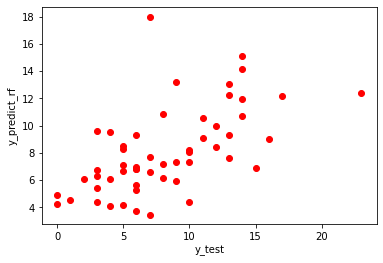

In [33]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_predict_rf = rf.predict(x_test)
rmse_rf = mean_squared_error(y_test, y_predict_rf, squared=False)
print('The RSME is '+ str(rmse_rf))

plt.scatter(y_test, y_predict_rf,  color='red')
plt.xlabel('y_test')
plt.ylabel('y_predict_rf')

It appears that the Random Forest Regressor model performs slightly better than the other models. Now I will try to try to see if our dummified categorical data is more useful in predicting ToDep. Before training the model, I realised that some of the variables are related to 'ToDep' which would affect the accuracy of the model. These were the following columns that I dropped:

1. DepSev_Min
2. DepSev_Mod
3. DepSev_ModSev
4. DepSev_Sev
5. Dep_Yes
6. DepType_Other
7. DepType_No

## Categorical Data

In [34]:
x = dummy_cat_data
y = numerical_data[['ToDep']]
x

,Unnamed: 0,inter_dom_Inter,Region_JAP,Region_Others,Region_SA,Region_SEA,Gender_Male,Academic_Under,Stay_Cate_Medium,Stay_Cate_Short,...,Friends_bi_Yes,Parents_bi_Yes,Relative_bi_Yes,Professional_bi_Yes,Phone_bi_Yes,Doctor_bi_Yes,religion_bi_Yes,Alone_bi_Yes,Others_bi_Yes,Internet_bi_Yes
0,0,1,0,0,0,1,1,0,0,0,...,1,1,0,0,0,0,0,0,0,0
1,1,1,0,0,0,1,1,0,0,1,...,1,1,0,0,0,0,0,0,0,0
2,2,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1,0,0,0,0,0,0,0,1,...,1,1,1,1,0,0,0,0,0,0
4,4,1,0,0,0,0,0,0,0,1,...,1,1,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,263,0,1,0,0,0,0,1,0,0,...,1,1,0,0,0,0,0,0,0,1
264,264,0,1,0,0,0,0,1,1,0,...,1,1,1,0,0,0,0,0,0,0
265,265,0,1,0,0,0,0,1,0,1,...,1,1,1,1,1,1,0,0,0,0
266,266,0,1,0,0,0,1,1,0,1,...,1,1,1,1,1,1,0,0,0,0


In [35]:
x = dummy_cat_data.drop(['DepSev_Min', 'DepSev_Mod','DepSev_ModSev','DepSev_Sev','Dep_Yes','DepType_Other','DepType_No'], axis = 1)
x

,Unnamed: 0,inter_dom_Inter,Region_JAP,Region_Others,Region_SA,Region_SEA,Gender_Male,Academic_Under,Stay_Cate_Medium,Stay_Cate_Short,...,Friends_bi_Yes,Parents_bi_Yes,Relative_bi_Yes,Professional_bi_Yes,Phone_bi_Yes,Doctor_bi_Yes,religion_bi_Yes,Alone_bi_Yes,Others_bi_Yes,Internet_bi_Yes
0,0,1,0,0,0,1,1,0,0,0,...,1,1,0,0,0,0,0,0,0,0
1,1,1,0,0,0,1,1,0,0,1,...,1,1,0,0,0,0,0,0,0,0
2,2,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1,0,0,0,0,0,0,0,1,...,1,1,1,1,0,0,0,0,0,0
4,4,1,0,0,0,0,0,0,0,1,...,1,1,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,263,0,1,0,0,0,0,1,0,0,...,1,1,0,0,0,0,0,0,0,1
264,264,0,1,0,0,0,0,1,1,0,...,1,1,1,0,0,0,0,0,0,0
265,265,0,1,0,0,0,0,1,0,1,...,1,1,1,1,1,1,0,0,0,0
266,266,0,1,0,0,0,1,1,0,1,...,1,1,1,1,1,1,0,0,0,0


### Linear Regression Model

214 54 214 54
The RSME is 4.961978199754059


Text(0, 0.5, 'y_predict_lm')

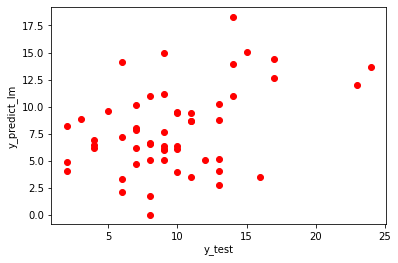

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
print(len(x_train),len(x_test),len(y_train),len(y_test))

lm = LinearRegression()
lm.fit(x_train,y_train)
y_predict_lm = lm.predict(x_test)
rmse_lm = mean_squared_error(y_test, y_predict_lm, squared=False)
print('The RSME is '+ str(rmse_lm))

plt.scatter(y_test, y_predict_lm,  color='red')
plt.xlabel('y_test')
plt.ylabel('y_predict_lm')

### Decision Tree Model

The RSME is 5.429685210164719


Text(0, 0.5, 'y_predict_dt')

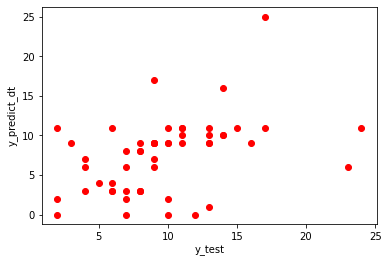

In [37]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_predict_dt = dt.predict(x_test)
rmse_dt = mean_squared_error(y_test, y_predict_dt, squared=False)
print('The RSME is '+ str(rmse_dt))

plt.scatter(y_test, y_predict_dt,  color='red')
plt.xlabel('y_test')
plt.ylabel('y_predict_dt')

### Random Forest Regressor Model

<ipython-input-38-ebdb1ce7f9ec>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


The RSME is 4.190794364724593


Text(0, 0.5, 'y_predict_rf')

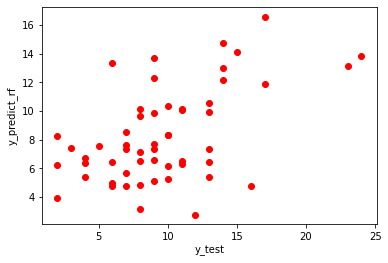

In [38]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_predict_rf = rf.predict(x_test)
rmse_rf = mean_squared_error(y_test, y_predict_rf, squared=False)
print('The RSME is '+ str(rmse_rf))

plt.scatter(y_test, y_predict_rf,  color='red')
plt.xlabel('y_test')
plt.ylabel('y_predict_rf')

The models obtained were not as desirable as I had hoped so I decided to use the dataframe with numerical and dummified categorical variables and dropping the following variables as they are related to the 'ToDep' score:

1. DepSev_Min
2. DepSev_Mod
3. DepSev_ModSev
4. DepSev_Sev
5. Dep_Yes
6. DepType_Other
7. DepType_No
8. ToDep
9. Age_cate

### Linear Regression Model

214 54 214 54
The RSME is 4.129884436561148


Text(0, 0.5, 'y_predict_lm')

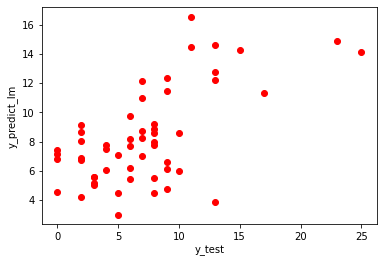

In [39]:
x = dummy_data.drop(['DepSev_Min', 'DepSev_Mod','DepSev_ModSev','DepSev_Sev','Dep_Yes','DepType_Other','DepType_No','ToDep','Age_cate'], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
print(len(x_train),len(x_test),len(y_train),len(y_test))

lm = LinearRegression()
lm.fit(x_train,y_train)
y_predict_lm = lm.predict(x_test)
rmse_lm = mean_squared_error(y_test, y_predict_lm, squared=False)
print('The RSME is '+ str(rmse_lm))

plt.scatter(y_test, y_predict_lm,  color='red')
plt.xlabel('y_test')
plt.ylabel('y_predict_lm')

### Decision Tree Model

The RSME is 4.735601960250241


Text(0, 0.5, 'y_predict_dt')

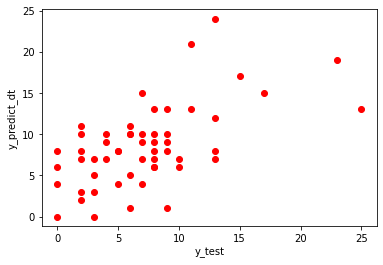

In [40]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_predict_dt = dt.predict(x_test)
rmse_dt = mean_squared_error(y_test, y_predict_dt, squared=False)
print('The RSME is '+ str(rmse_dt))

plt.scatter(y_test, y_predict_dt,  color='red')
plt.xlabel('y_test')
plt.ylabel('y_predict_dt')

### Random Forest Regressor

The RSME is 3.510311529912557


<ipython-input-41-ebdb1ce7f9ec>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


Text(0, 0.5, 'y_predict_rf')

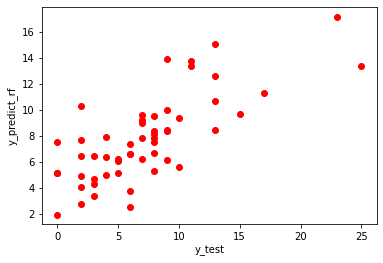

In [41]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_predict_rf = rf.predict(x_test)
rmse_rf = mean_squared_error(y_test, y_predict_rf, squared=False)
print('The RSME is '+ str(rmse_rf))

plt.scatter(y_test, y_predict_rf,  color='red')
plt.xlabel('y_test')
plt.ylabel('y_predict_rf')

# Machine Learning - Based on Suicide_Yes

After training models based on the ToDep score, I decided to try training models based on the 'Suicide' feature where 'Suicide' is a binary category that refers to whether a student has had suicide ideation in the past 2 weeks. If we can predict for this we can stop students from potentially acting on the ideation.

To make the model more realistic, I decided to train the model with general information about the students without results from tests. This is because we want to predict the suicide ideation without excessively testing the students. As such I decided to drop the following variables for the independent variables:

1. Age_cate
2. ToDep
3. ToSC
4. ToAS
5. Suicide_Yes

For the dependent variable, I used 'Suicide_Yes'

In [42]:
dummy_data
x_class = dummy_data.drop(['Age_cate','ToDep','ToSC','Suicide_Yes','ToAS'],axis = 1)
y_class = dummy_data[['Suicide_Yes']]
x_class

,Unnamed: 0,Age,Stay,Japanese,English,APD,AHome,APH,Afear,ACS,...,Friends_bi_Yes,Parents_bi_Yes,Relative_bi_Yes,Professional_bi_Yes,Phone_bi_Yes,Doctor_bi_Yes,religion_bi_Yes,Alone_bi_Yes,Others_bi_Yes,Internet_bi_Yes
0,0,24.0,5.0,3.0,5.0,23.0,9.0,11.0,8.0,11.0,...,1,1,0,0,0,0,0,0,0,0
1,1,28.0,1.0,4.0,4.0,8.0,7.0,5.0,4.0,3.0,...,1,1,0,0,0,0,0,0,0,0
2,2,25.0,6.0,4.0,4.0,13.0,4.0,7.0,6.0,4.0,...,0,0,0,0,0,0,0,0,0,0
3,3,29.0,1.0,2.0,3.0,16.0,10.0,10.0,8.0,6.0,...,1,1,1,1,0,0,0,0,0,0
4,4,28.0,1.0,1.0,3.0,15.0,12.0,5.0,8.0,7.0,...,1,1,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,263,21.0,4.0,5.0,4.0,16.0,9.0,10.0,8.0,7.0,...,1,1,0,0,0,0,0,0,0,1
264,264,22.0,3.0,3.0,4.0,8.0,10.0,5.0,4.0,3.0,...,1,1,1,0,0,0,0,0,0,0
265,265,19.0,1.0,5.0,3.0,8.0,7.0,5.0,5.0,3.0,...,1,1,1,1,1,1,0,0,0,0
266,266,19.0,1.0,5.0,3.0,8.0,12.0,5.0,4.0,3.0,...,1,1,1,1,1,1,0,0,0,0


In [43]:
x_train, x_test, y_train, y_test = train_test_split(x_class, y_class, test_size = 0.2,stratify=y_class)
print(len(x_train),len(x_test),len(y_train),len(y_test))

214 54 214 54


### Train a Dummy Classifier to set a baseline

In [44]:
dc = DummyClassifier()
dc.fit(x_train,y_train)
y_predict = dc.predict(x_test)

print(confusion_matrix(y_test,y_predict))
print(f1_score(y_test,y_predict,average = None))

[[34  8]
 [ 8  4]]
[0.80952381 0.33333333]


/Users/presh/opt/anaconda3/lib/python3.8/site-packages/sklearn/dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


### Decision Tree Classifier

In [54]:
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train, y_train)
predictions = model_dt.predict(x_test)
matrix_dt = confusion_matrix(y_test, predictions)
print(matrix_dt)

[[37  5]
 [ 7  5]]


<AxesSubplot:>

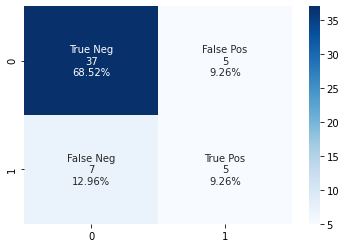

In [55]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                matrix_dt.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     matrix_dt.flatten()/np.sum(matrix_dt)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(matrix_dt, annot=labels, fmt='', cmap='Blues')

### Random Forest Classifier

In [56]:
model_rf = RandomForestClassifier(n_estimators = 100)
model_rf.fit(x_train, y_train.values.ravel())
predictions_rf = model_rf.predict(x_test)
matrix_rf = confusion_matrix(y_test, predictions_rf)
print(matrix_rf)


[[40  2]
 [ 8  4]]


<AxesSubplot:>

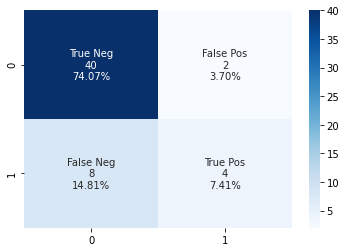

In [57]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                matrix_rf.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     matrix_rf.flatten()/np.sum(matrix_rf)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(matrix_rf, annot=labels, fmt='', cmap='Blues')

### Logistic Regression Classifier

In [58]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(x_train, y_train.values.ravel())
predictions = model_lr.predict(x_test)
matrix_lr = confusion_matrix(y_test, predictions)
print(matrix_lr)

[[42  0]
 [ 6  6]]


/Users/presh/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:>

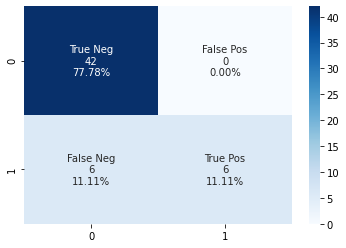

In [59]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                matrix_lr.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     matrix_lr.flatten()/np.sum(matrix_lr)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(matrix_lr, annot=labels, fmt='', cmap='Blues')

As seen from the 3 models above, we should predict less false negatives and more true positives since that's impactful. On the other hand, false positives aren't that bad compared to missing out true positives since it's just a nuisance for the student involved if he/she is falsely predicted to have suicide ideation.

Just from the models observed above, the Logistic Regression Classifies seems to have perform slightly better than the other models. With these models, we can deploy them in universities to identify and help students at risk.